In [2]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense,Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator

C:\Users\rlaal\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
np.random.seed(3)

train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory('handwriting_shape/train', target_size=(24, 24), batch_size=3, class_mode='categorical')

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = train_datagen.flow_from_directory('handwriting_shape/test', target_size=(24, 24), batch_size=3, class_mode='categorical')

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(24,24,3)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(3, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit_generator(train_generator, steps_per_epoch=15, epochs=100, validation_data=test_generator, validation_steps=5)



Found 45 images belonging to 3 classes.
Found 15 images belonging to 3 classes.
Epoch 1/100
15/15 [==============================] - 1s 59ms/step - loss: 0.9414 - acc: 0.6000 - val_loss: 0.4588 - val_acc: 0.8667
Epoch 2/100
15/15 [==============================] - 1s 34ms/step - loss: 0.2012 - acc: 0.9111 - val_loss: 0.0845 - val_acc: 1.0000
Epoch 3/100
15/15 [==============================] - 1s 34ms/step - loss: 0.0478 - acc: 0.9778 - val_loss: 0.0768 - val_acc: 0.9333
Epoch 4/100
15/15 [==============================] - 0s 31ms/step - loss: 0.0039 - acc: 1.0000 - val_loss: 0.0284 - val_acc: 1.0000
Epoch 5/100
15/15 [==============================] - 0s 31ms/step - loss: 0.0013 - acc: 1.0000 - val_loss: 0.0350 - val_acc: 1.0000
Epoch 6/100
15/15 [==============================] - 0s 31ms/step - loss: 3.9027e-04 - acc: 1.0000 - val_loss: 0.0433 - val_acc: 1.0000
Epoch 7/100
15/15 [==============================] - 0s 33ms/step - loss: 2.6522e-04 - acc: 1.0000 - val_loss: 0.0377 - val_

KeyboardInterrupt: 

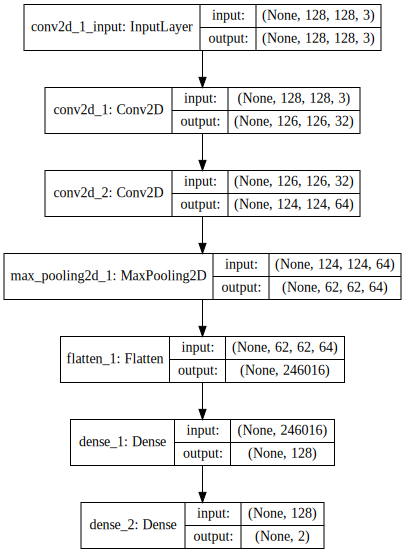

In [10]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

%matplotlib inline

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [14]:
train_datagen = ImageDataGenerator(rescale=1./255)
train_genetator = train_datagen.flow_from_directory('handwriting_shape/train', target_size=(128, 128), batch_size=5, class_mode='categorical')

Found 45 images belonging to 3 classes.


In [38]:
np.random.seed(3)

train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory('data_set/128x128/train', target_size=(128, 128), batch_size=2, class_mode='categorical')

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = train_datagen.flow_from_directory('data_set/128x128/test', target_size=(128, 128), batch_size=2, class_mode='categorical')

print(test_generator)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(128,128,3)))
#model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
#model.add(Dense(128, activation='relu'))
model.add(Dense(2, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit_generator(train_generator, steps_per_epoch=15, epochs=20, validation_data=train_generator, validation_steps=5)



Found 30 images belonging to 2 classes.
Found 10 images belonging to 2 classes.
Epoch 1/20
15/15 [==============================] - 1s 72ms/step - loss: 5.3820 - acc: 0.6000 - val_loss: 3.5088 - val_acc: 0.7000
Epoch 2/20
15/15 [==============================] - 1s 42ms/step - loss: 1.0072 - acc: 0.6667 - val_loss: 0.4596 - val_acc: 0.7000
Epoch 3/20
15/15 [==============================] - 1s 41ms/step - loss: 0.3351 - acc: 0.8667 - val_loss: 0.3195 - val_acc: 0.9000
Epoch 4/20
15/15 [==============================] - 1s 42ms/step - loss: 0.1509 - acc: 0.9667 - val_loss: 0.0801 - val_acc: 1.0000
Epoch 5/20
15/15 [==============================] - 1s 41ms/step - loss: 0.0713 - acc: 1.0000 - val_loss: 0.0384 - val_acc: 1.0000
Epoch 6/20
15/15 [==============================] - 1s 43ms/step - loss: 0.0196 - acc: 1.0000 - val_loss: 0.0150 - val_acc: 1.0000
Epoch 7/20
15/15 [==============================] - 1s 41ms/step - loss: 0.0138 - acc: 1.0000 - val_loss: 0.0086 - val_acc: 1.0000
Epo

In [42]:
print("--Evaluate--")
scores = model.evaluate_generator(test_generator, steps=10)
print("%s: %.2f%%"%(model.metrics_names[1], scores[1]*100))

print("--Pridict--")
output = model.predict_generator(test_generator, steps=10)
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
print(test_generator.class_indices)
print(output)

--Evaluate--
acc: 90.00%
--Pridict--
{'man': 0, 'woman': 1}
[[0.979 0.021]
 [0.001 0.999]
 [0.954 0.046]
 [0.997 0.003]
 [0.207 0.793]
 [0.008 0.992]
 [0.999 0.001]
 [0.997 0.003]
 [0.700 0.300]
 [0.112 0.888]
 [0.997 0.003]
 [0.112 0.888]
 [0.999 0.001]
 [0.207 0.793]
 [0.954 0.046]
 [0.008 0.992]
 [0.700 0.300]
 [0.979 0.021]
 [0.001 0.999]
 [0.997 0.003]]


In [ ]:
#머신러닝 데이터로 테스트해본 모델 성능

from sklearn.datasets import fetch_lfw_people
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)

mask = np.zeros(people.target.shape, dtype=np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1
    
X_people = people.data[mask]
y_people = people.target[mask]

X_people = X_people / 255.

X_train, X_test, y_train, y_test = train_test_split


model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(128,128,3)))
model.add(Conv2D(512, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(2, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit_generator(train_generator, steps_per_epoch=15, epochs=100, validation_data=test_generator, validation_steps=5)